# R for Data Science Meeting 2 (6/1/22)

Welcome to the second class in the R for Data Science Summer Series, developed for the Walton Lab! In this meeting, we will primarily be working on data structures and how to inspect them. We will also briefly review last week's meeting.

Learning Objectives:
- Review last weeks meeting (packages, data import, and ggplot). 12:00-12:15.
- Define data structures in R (vectors, lists, data tables). 12:15-12:40.
  - Subset and extract values from these data structures and types.
- Work together in order to organize behavioral data through working with the 3 different data structures we learned. 12:40-1:00.

As a supplementary resource, please see the R for Data Science book by Hadley Wickham (https://r4ds.had.co.nz/index.html). We will not be directly using this book for meetings, but it will prove to be a handy resource as you continue down the path of data science.

Also, I'm giving credit to François Michonneau & Auriel Fournier (https://datacarpentry.org/R-ecology-lesson/index.html) for their intro to R lesson.

## Review of Last Week's Meeting

In [1]:
# load in packages into the library
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# import behavior data
dats_d_prime <- fread("../data/dats_d_prime.csv")
head(dats_d_prime)

alias                  animal.id ToneFreq FloordB age_group awt_months
1 092220_16TPCSIN_1283   1283      16000    -100    old       24        
2 092220_16TPCSIN_1283   1283      16000    -100    old       24        
3 092220_16TPCSIN_1283   1283      16000    -100    old       24        
4 092220_16TPCSIN_1283   1283      16000    -100    old       24        
5 092220_16TPCSIN_1283   1283      16000    -100    old       24        
6 09242020_16TPCSIN_1283 1283      16000    -100    old       24        
  awt_days dot        dob        schedule.file                 PPdB
1 737      2020-09-22 2018-09-16 Tone-PPI_16K_SIN_Control.srsf 65  
2 737      2020-09-22 2018-09-16 Tone-PPI_16K_SIN_Control.srsf 68  
3 737      2020-09-22 2018-09-16 Tone-PPI_16K_SIN_Control.srsf 71  
4 737      2020-09-22 2018-09-16 Tone-PPI_16K_SIN_Control.srsf 74  
5 737      2020-09-22 2018-09-16 Tone-PPI_16K_SIN_Control.srsf 77  
6 739      2020-09-24 2018-09-16 Tone-PPI_16K_SIN_Control.srsf 71  
  peak.amp.mean_control peak.amp.mean_inhibitory peak.amp.sd_control
1 0.023673564           0.008180094              0.014412091        
2 0.023673564           0.008451043              0.014412091        
3 0.023673564           0.006754562              0.014412091        
4 0.023673564           0.005426829              0.014412091        
5 0.023673564           0.007307874              0.014412091        
6 0.004417606           0.005168172              0.006962606        
  peak.amp.sd_inhibitory corrected.sd amp.diff      d_prime   
1 0.009874377            0.012353373   0.0154934698  1.2541894
2 0.008313192            0.011764725   0.0152225209  1.2939122
3 0.007303863            0.011424858   0.0169190020  1.4808938
4 0.005672287            0.010951785   0.0182467347  1.6660969
5 0.008385818            0.011790469   0.0163656904  1.3880441
6 0.005246900            0.006164732  -0.0007505661 -0.1217516

Warning message:
“Removed 89 rows containing missing values (geom_point).”


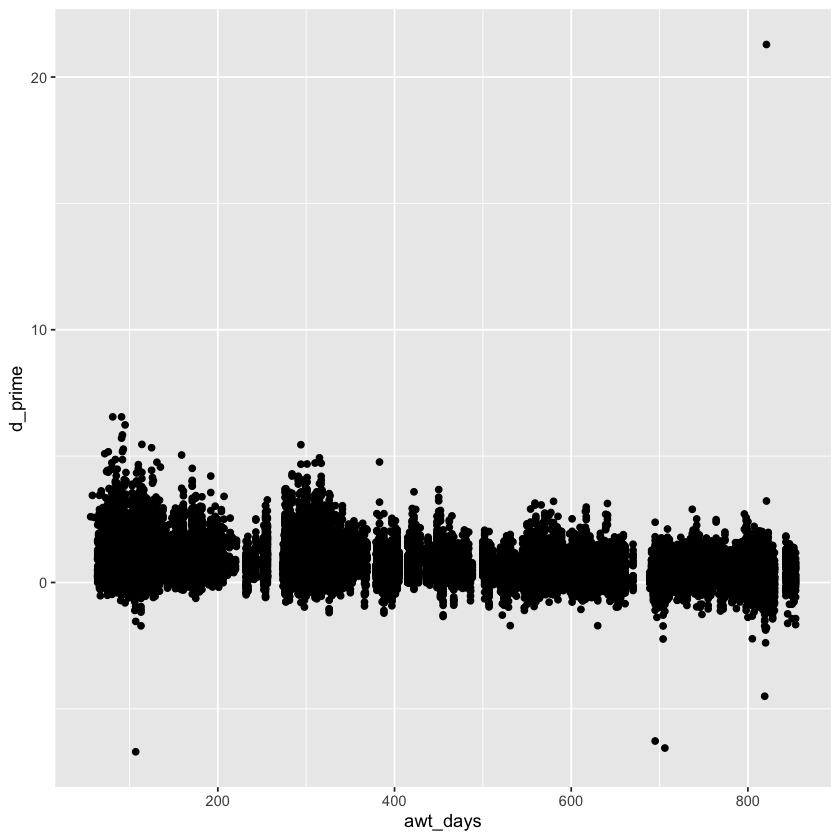

In [4]:
# visualize the data
ggplot(data = dats_d_prime, aes(x = awt_days, y = d_prime)) +
    geom_point()

Remember: all ggplots are a collection of data arguments (x & y and groupings) and geoms. A ggplot with more bells and whistles is simply a culmination of multiple geoms layered on top of one another.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 93 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 93 rows containing missing values (geom_point).”


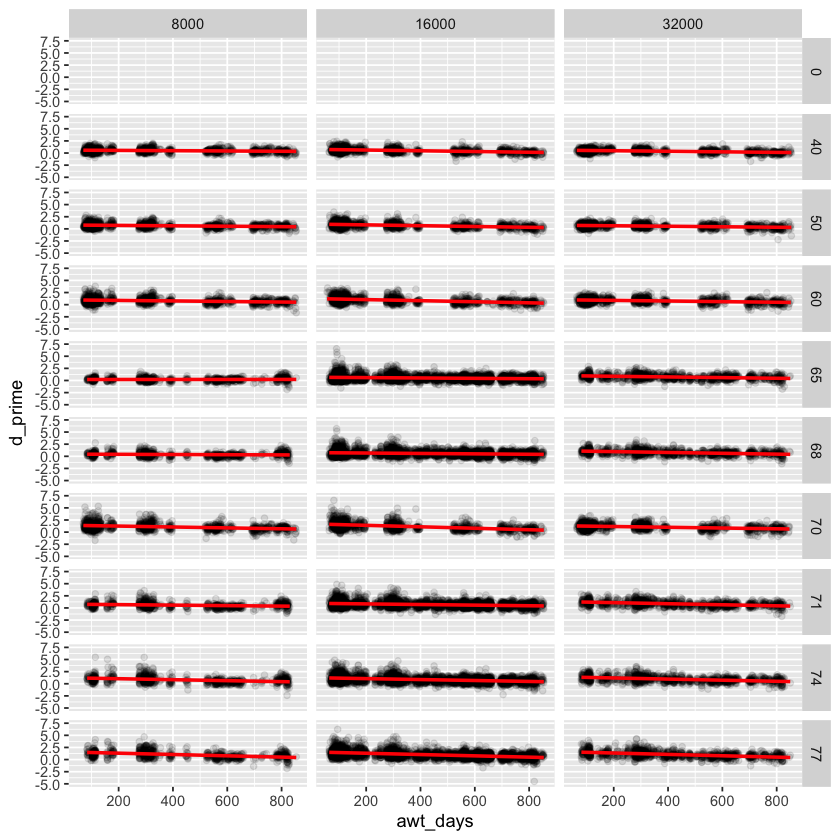

In [5]:
# introduce facetting
ggplot(dats_d_prime, aes(awt_days, d_prime)) +
    geom_point(alpha = 0.1) +
    ylim(-5, 7.5) +
    geom_smooth(method = lm, se = TRUE, color = "red") +
    facet_grid(PPdB ~ ToneFreq)

In [4]:
# clean up visualization
ggplot(dats_d_prime[PPdB %in% c(65, 68, 71, 74, 77) & FloordB %in% c(-100, 65) & d_prime < 20], aes(awt_days, d_prime)) +
    geom_point(alpha = 0.1) +
    geom_smooth(method = lm, se = TRUE, color = "red") +
    facet_grid(PPdB ~ ToneFreq + FloordB, scales = "free") +
    labs(title = "D-prime as a function of age across frequency, noise, and prepulse intensity")

`geom_smooth()` using formula 'y ~ x'



In [6]:
# read in abr data
dats_abr <- fread("../data/abr_vdt_data.csv")
head(dats_abr)

animal.id Sex DOB        ABR_Date   awt_months age_group freq  vdt
1 1656      M   0019-10-03 0019-12-16 2          young     Freq8 40 
2 2184      F   0020-12-28 0021-03-26 2          young     Freq8 33 
3 2185      F   0020-12-28 0021-03-26 2          young     Freq8 25 
4 2186      F   0020-12-28 0021-03-26 2          young     Freq8 30 
5 2187      F   0020-12-28 0021-03-26 2          young     Freq8 38 
6 2188      F   0020-12-28 0021-03-26 2          young     Freq8 28

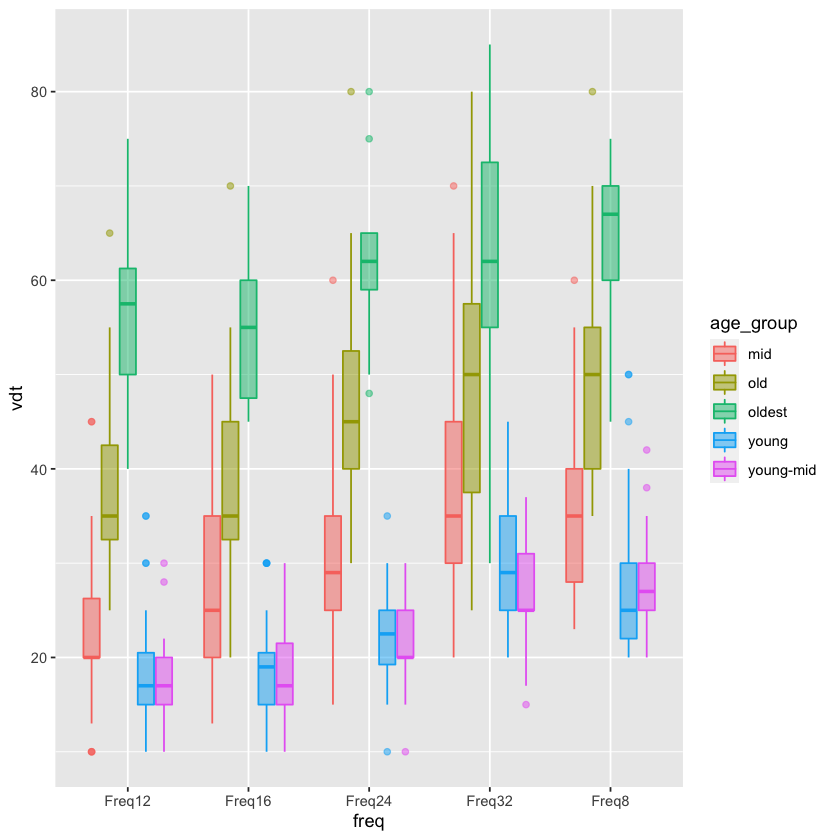

In [14]:
# visualize the data
ggplot(dats_abr, aes(freq, vdt, color = age_group, fill = age_group)) +
geom_boxplot(alpha = 0.5)

In [15]:
# frequencies and age group are not in order.
# convert them to factors, then order via levels.
dats_abr$freq <- factor(dats_abr$freq, levels = c("Freq8", "Freq12", "Freq16", "Freq24", "Freq32"))
dats_abr$age_group <- factor(dats_abr$age_group, levels = c("young", "young-mid", "mid", "old", "oldest"))

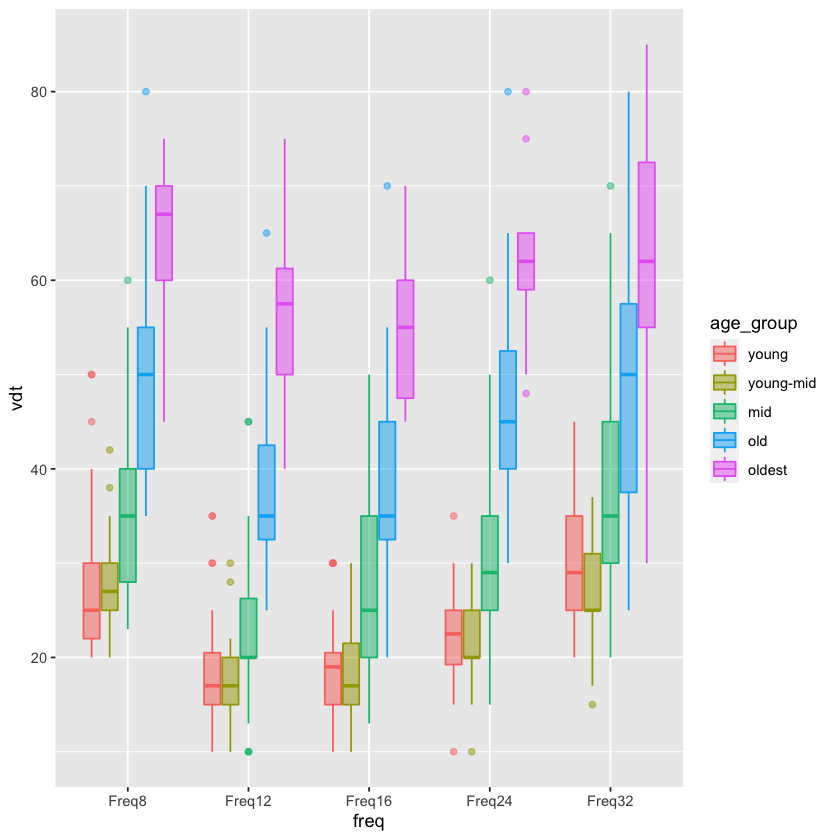

In [16]:
# visualize the data with correct order for frequency and age group.
ggplot(dats_abr, aes(freq, vdt, color = age_group, fill = age_group)) +
geom_boxplot(alpha = 0.5)

## Exercise 1: Data Structures

### Vectors

In [ ]:
Key Components of Vectors:
- A vector is an ordered collection of basic data types of a given length.
- All elements of a vector must be of the identical data type.
- Vectors are one-dimensional data structures.
- Most common and basic data type in R.
- Can be composed by either numbers or characters.
- Can assign a series of values to a vector using the c() function.

In [19]:
# for example, we can create a vector of animal weights and assign it to a new object weight_g.
weight_g <- c(23, 27, 32, 35)
weight_g

[1] 23 27 32 35

In [22]:
# a vector can also contain characters.
animals <- c("mouse", "rat", "guinea pig", "gerbil")

There are many functions that allow you to inspect the content of a vector. length() tells you how many elements are in a particular vector:

In [23]:
length(weight_g)
length(animals)

[1] 4

[1] 4

class() indicates what type of object you are working with:

In [24]:
class(weight_g)
class(animals)

[1] "numeric"

[1] "character"

The function str() provides an overview of the structure of an object and its elements. It is a useful function when working with large and complex objects:

In [25]:
str(weight_g)
str(animals)

 num [1:4] 23 27 32 35
 chr [1:4] "mouse" "rat" "guinea pig" "gerbil"


You can use the c() function to add other elements to your vector:

In [26]:
weight_g <- c(weight_g, 43) # add to the end of the vector
weight_g <- c(21, weight_g) # add to the beginning of the vector
weight_g

[1] 21 23 27 32 35 43

In the first line, we take the original vector weight_g, add the value 43 to the end of it, and save the result back into weight_g. Then we add the value 21 to the beginning, again saving the result back into weight_g.

We can do this over and over again to grow a vector, or assemble a dataset. As we program, this may be useful to add results that we are collecting or calculating.

An atomic vector is the simplest R data type and is a linear vector of a single type. Above, we saw 2 of the 6 main atomic vector types that R uses: "character" and "numeric" (or "double"). These are the basic building blocks that all R objects are built from. The other 4 atomic vector types are:

- "logical" for TRUE and FALSE (the boolean data type)
- "integer" for integer numbers (e.g., 2L, the L indicates to R that it’s an integer)
- "complex" to represent complex numbers with real and imaginary parts (e.g., 1 + 4i) and that’s all we’re going      to say about them
- "raw" for bitstreams that we won’t discuss further

You can check the type of your vector using the typeof() function and inputting your vector as the argument.

#### Subsetting Vectors

If we want to extract one or several values from a vector, we must provide one or several indices in square brackets. For instance:

In [28]:
animals <- c("mouse", "rat", "guinea pig", "gerbil")
animals[2]

[1] "rat"

In [29]:
animals[c(3, 2)]

[1] "guinea pig" "rat"

We can also repeat the indices to create an object with more elements than the original one:

In [30]:
more_animals <- animals[c(1, 2, 3, 2, 1, 4)]
more_animals

[1] "mouse"      "rat"        "guinea pig" "rat"        "mouse"     
[6] "gerbil"

#### Conditional Subsetting

Another common way of subsetting is by using a logical vector. TRUE will select the element with the same index, while FALSE will not:

In [31]:
weight_g <- c(21, 34, 39, 54, 55)
weight_g[c(TRUE, FALSE, FALSE, TRUE, TRUE)]

[1] 21 54 55

Typically, these logical vectors are not typed by hand, but are the output of other functions or logical tests. For instance, if you wanted to select only the values above 50:

In [32]:
weight_g > 50    # will return logicals with TRUE for the indices that meet the condition

[1] FALSE FALSE FALSE  TRUE  TRUE

We can use this to select only the values above 50:

In [33]:
weight_g[weight_g > 50]

[1] 54 55

You can combine multiple tests using & (both conditions are true, AND) or | (at least one of the conditions is true, OR):

In [35]:
weight_g[weight_g > 30 & weight_g < 50]

[1] 34 39

In [36]:
weight_g[weight_g <= 30 | weight_g == 55]

[1] 21 55

In [38]:
weight_g[weight_g >= 30 & weight_g == 21]

numeric(0)

Here, > for “greater than”, < stands for “less than”, <= for “less than or equal to”, and == for “equal to”. The double equal sign == is a test for numerical equality between the left and right hand sides, and should not be confused with the single = sign, which performs variable assignment (similar to <-).

A common task is to search for certain strings in a vector. One could use the “or” operator | to test for equality to multiple values, but this can quickly become tedious. The function %in% allows you to test if any of the elements of a search vector are found:

In [46]:
animals <- c("mouse", "rat", "guinea pig", "gerbil", "gerbil")

# return both rat and gerbil
animals[animals == "gerbil" | animals == "rat"]

[1] "rat"    "gerbil" "gerbil"

In [47]:
# return a logical vector that is TRUE for the elements within animals
# that are found in the character vector and FALSE for those that are not
animals %in% c("rat", "gerbil", "guinea pig", "duck", "goat", "bird", "fish")

[1] FALSE  TRUE  TRUE  TRUE  TRUE

In [48]:
# use the logical vector created by %in% to return elements from animals
# that are found in the character vector
animals[animals %in% c("rat", "gerbil", "guinea pig", "duck", "goat", "bird", "fish")]

[1] "rat"        "guinea pig" "gerbil"     "gerbil"

#### Missing Data

As R was designed to analyze datasets, it includes the concept of missing data (which is uncommon in other programming languages). Missing data are represented in vectors as NA.

When doing operations on numbers, most functions will return NA if the data you are working with include missing values. This feature makes it harder to overlook the cases where you are dealing with missing data. You can add the argument na.rm = TRUE to calculate the result as if the missing values were removed (rm stands for ReMoved) first.

In [53]:
heights <- c(2, 4, 4, NA, 6)
mean(heights)
max(heights)
mean(heights, na.rm = TRUE)
max(heights, na.rm = TRUE)

[1] NA

[1] NA

[1] 4

[1] 6

If your data include missing values, you may want to become familiar with the functions is.na(), na.omit(), and complete.cases(). See below for examples.

In [57]:
# Extract those elements which are not missing values.
heights[!is.na(heights)]

na.omit(heights)

heights[complete.cases(heights)]

[1] 2 4 4 6

[1] 2 4 4 6
attr(,"na.action")
[1] 4
attr(,"class")
[1] "omit"

[1] 2 4 4 6

### Lists

Key Components of Lists:
- A list can contain multiple data types.
- It is also a one-dimensional data structure.
- A list can be a list of vectors, data.tables, characters, functions, etc.

In [60]:
# Creating a list
# The first attributes is a numeric vector containing animal IDs which is created using the 'c' command here
animal.id <- c(1, 2, 3, 4)

# The second attribute is the animal name which is created by a character vector
animal.name <- c("Jeff", "Bettie", "Scott", "Emma")

# The third attribute is the number of animals which is a single numeric variable.
number.of.animals <- 4

# We can combine all these three different data types into a list which can be done using a list command
animal.list <- list(animal.id, animal.name, number.of.animals)

print(animal.list)

[[1]]
[1] 1 2 3 4

[[2]]
[1] "Jeff"   "Bettie" "Scott"  "Emma"  

[[3]]
[1] 4



#### Subsetting Lists

We can extract data from a list quite similarly to how we subsetted vectors:
Using the square brackets and providing an index.

In [75]:
print(animal.list[2])

[[1]]
[1] "Jeff"   "Bettie" "Scott"  "Emma"  

[1] "Jeff"   "Bettie" "Scott"  "Emma"  


Notice that there is a number associated with the result (i.e., [1]). Using str(), we can further investigate this.

In [73]:
str(animal.list[2])

List of 1
 $ : chr [1:4] "Jeff" "Bettie" "Scott" "Emma"


The output is still in list form. However, if we add another layer of brackets, the result will change (i.e., [[2]]).

In [74]:
str(animal.list[[2]])

 chr [1:4] "Jeff" "Bettie" "Scott" "Emma"


Now the output is just a character vector, not part of a list anymore. This distinction is useful if you are trying to extract a specific part of the data within a list (as [] just returns another list of elements).

### Data tables

Key Components of Data tables:
- Store tabular data.
- Two dimensional, heterogeneuous data structure.
- Lists of vectors of equal lengths.

Data tables have the following constraints placed upon them: 

- A data table must have column names and every row should have a unique name.
- Each column must have the identical number of items.
- Each item in a single column must be of the same data type.
- Different columns may have different data types.

In [80]:
# Creating a data.table

# A vector which is a character vector
Name <- c("Amiya", "Raj", "Amelia")

# A vector which is a character vector
Language <- c("R", "Python", "Java")

# A vector which is a numeric vector
Age <- c(22, 25, 45)

# To create dataframe use data.table command and then pass each of the vectors we have created as arguments.
df <- data.table(Name, Language, Age)

print(df)
# be aware of the distinction between outputs between print and calling the object.
df

     Name Language Age
1:  Amiya        R  22
2:    Raj   Python  25
3: Amelia     Java  45


Name   Language Age
1 Amiya  R        22 
2 Raj    Python   25 
3 Amelia Java     45

#### Subsetting Data Tables

Subsetting data tables is similar to vectors and lists. Use square brackets but now indicate which column you are filtering from at the beginning of the argument (i.e., [Age == 22]).

In [82]:
df[Age == 22]

Name  Language Age
1 Amiya R        22

Additionally, you can subset based off of the opposite of what you want in the output (using the ! or "not" operator).

In [83]:
df[Age != 22]

Name   Language Age
1 Raj    Python   25 
2 Amelia Java     45

You can also subset based off of multiple values by using the %in% operator followed by a c().

In [84]:
df[Language %in% c("R", "Java")]

Name   Language Age
1 Amiya  R        22 
2 Amelia Java     45

## Exercise 2: Behavior Dataset

Now that we have learned fundamental data structures and subsetting techniques, let's put these skills to use in a behavioral dataset.